# INDENG 241 Final Project

## Logistic Regression

The purpose of this document is to apply the model of logistic regression to a previously organized and cleaned dataset. We use logistic regression to predict the winning percentage of the blue side (Team1) against the red side (Team2). For the selection of variables, we use VIF to remove variables that have larger values or that we consider more unimportant. Also, we can use k-fold validation to find suitable models.

In [1]:
import pandas as pd
import numpy as np
Team1vsTeam2 = pd.read_excel(r'Team1vsTeam2_2019-2023.xlsx') # The dataset that contain all the match statistics from 2019 to 2023

Team1vsTeam2 = Team1vsTeam2.drop(['index'], axis=1) # Remove the column that contains the team name
Team1vsTeam2

,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,F3T,HLD,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin
0,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,0.03,0.02,0.05,0.03,0.25,0.11,-0.003,-0.004,0.23,0.03,1
1,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,-0.03,0.12,0.10,0.06,0.00,0.10,-0.001,0.027,0.26,-0.05,1
2,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,0.06,-0.05,-0.05,0.00,-0.40,0.01,0.002,0.019,-0.02,-0.17,1
3,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,-0.19,-0.03,0.05,-0.04,0.64,-0.08,-0.012,-0.058,-0.22,-0.17,0
4,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,0.03,0.10,-0.02,-0.03,0.56,0.06,0.001,0.017,-0.25,-0.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,-0.109790,-0.30,-0.20,-0.47,-0.027,-5.8,-5.7,-0.12,-0.09,-0.04,-0.05,-0.11,-0.07,-0.09,-0.08,0.000,-0.024,0.26,0.12,1
342,-0.070833,-0.09,-0.02,-0.10,0.019,-7.0,-0.1,-0.15,-0.03,-0.12,0.04,-0.11,-0.02,-0.44,0.01,0.001,0.019,0.56,0.30,0
343,0.103757,-0.03,0.38,0.17,0.022,1.5,9.5,-0.23,0.04,-0.04,-0.10,-0.11,-0.05,0.03,0.10,0.016,0.039,-0.54,-0.28,1
344,0.177327,0.30,0.12,0.60,0.019,8.0,11.2,0.03,-0.01,0.04,-0.10,0.16,0.07,0.51,0.09,-0.001,0.000,0.06,-0.10,1


In [2]:
# Split to train and test set
from sklearn.model_selection import train_test_split

Team1vsTeam2_train, Team1vsTeam2_test = train_test_split(Team1vsTeam2, test_size=0.2, random_state=88)

Team1vsTeam2_train.shape, Team1vsTeam2_test.shape

((276, 20), (70, 20))

#### Baseline Model
Calculate the Winning rate of blue side(Team1) without any prediction with variables. And we want to create models that performs better than the baseline model.

In [3]:
default_false = np.sum(Team1vsTeam2_train['IsWin'] == 0)  # not Win 
default_true = np.sum(Team1vsTeam2_train['IsWin'] == 1)   # Win

ACC = default_true/(default_false + default_true)

print(pd.Series({'0': default_false, '1': default_true}), 'Accuracy:', ACC)

0    130
1    146
dtype: int64 Accuracy: 0.5289855072463768


A baseline model can be a so-called "dummy" model, where the classifier predicts every new observation as the majority class. In our case, for a datapoint with any given features, the baseline model will always predict that blue side(Team1) will win.

#### Apply the Baseline Model on testing

In [4]:
default_false_test = np.sum(Team1vsTeam2_test['IsWin'] == 0)
default_true_test = np.sum(Team1vsTeam2_test['IsWin'] == 1)
ACC_test = default_true_test/(default_false_test + default_true_test)

ACC_test

0.4714285714285714

#### Model Fitting (Logistic Regression)

In [5]:
import statsmodels.formula.api as smf

logreg = smf.logit(formula = 'IsWin ~ WR + KD + CKPM + GPR + GSPD + EGR + MLR + FB + FT + F3T + HLD + FD + DRG + ELD + BN + LNE + JNG + WPM + CWPM',
                   data = Team1vsTeam2_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.597576
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  IsWin   No. Observations:                  276
Model:                          Logit   Df Residuals:                      256
Method:                           MLE   Df Model:                           19
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.1358
Time:                        18:54:52   Log-Likelihood:                -164.93
converged:                       True   LL-Null:                       -190.84
Covariance Type:            nonrobust   LLR p-value:                 7.021e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0870      0.135      0.646      0.518      -0.177       0.351
WR             7.0295      6.

In [6]:
y_test = Team1vsTeam2_test['IsWin']

y_prob = logreg.predict(Team1vsTeam2_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

# y_pred is the vector of probabilities as given by your model on the test set. 
# Values between 0 and 1.

# Remember, P(Yi = 1) = 1/(1 + e^(-(b0 + b1*x1 + b2*x2 +...)) )
y_pred

92     1
153    0
53     0
219    0
309    1
      ..
56     0
68     1
190    0
32     1
8      1
Length: 70, dtype: int64

#### Model Evaluation

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Accuracy
Acc_logit = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())  # T/total = (TP+TN)/total
TPR_logit = (cm.ravel()[3])/(cm.ravel()[2] + cm.ravel()[3])  # TP/TP + FN
FPR_logit = (cm.ravel()[1])/(cm.ravel()[0] + cm.ravel()[1])  # FP/TN + FP
print('The test Accuracy:', Acc_logit, 'TPR: ', TPR_logit, 'FPR: ', FPR_logit)

The test Accuracy: 0.6571428571428571 TPR:  0.7272727272727273 FPR:  0.40540540540540543


---
#### Variable Selection
VIF

In [8]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['WR', 'KD', 'CKPM', 'GPR', 'GSPD', 'EGR', 'MLR', 'FB', 'FT', 'F3T', 'HLD', 'FD', 'DRG', 'ELD', 'BN', 'LNE', 'JNG', 'WPM', 'CWPM']
VIF(Team1vsTeam2_train, cols)

WR      24.994782
KD      11.216248
CKPM     3.523448
GPR     18.459125
GSPD    15.317651
EGR     20.799872
MLR      7.609644
FB       2.322132
FT       3.356831
F3T      5.246941
HLD      2.665078
FD       4.003843
DRG      6.181712
ELD      1.751336
BN       4.898323
LNE      2.128150
JNG      4.190203
WPM      3.674149
CWPM     3.670142
dtype: float64

In [9]:
# remove WR(Win Rate) because of its high VIF
# GPR: Gold percent rating (average amount of game's total gold held, relative to 50%)
# GSPD: Average gold spent percentage difference
# EGR: Early-Game rating: the first 10-15 minutes of the game, Key points for early game: Holding lanes, Farming gold/experience, Low level champions (most often they are between level 1-12)
# Since EGR is the Early-Game overall rating, so we delete rest of other.

cols = ['KD', 'CKPM', 'EGR', 'MLR', 'FB', 'FT', 'F3T', 'HLD', 'FD', 'DRG', 'ELD', 'BN', 'LNE', 'JNG', 'WPM', 'CWPM']
VIF(Team1vsTeam2_train, cols)

KD      6.702060
CKPM    2.536378
EGR     9.357927
MLR     3.665200
FB      2.222976
FT      2.915730
F3T     4.158089
HLD     2.203375
FD      3.943357
DRG     6.045815
ELD     1.497679
BN      3.496135
LNE     1.686624
JNG     2.870953
WPM     3.425858
CWPM    3.326623
dtype: float64

In [10]:
logreg_removedHighVIFVariable = smf.logit(formula = 'IsWin ~ KD + CKPM + EGR + MLR + FB + FT + F3T + HLD + FD + DRG + ELD + BN + LNE + JNG + WPM + CWPM',
                   data = Team1vsTeam2_train).fit()

print(logreg_removedHighVIFVariable.summary())

Optimization terminated successfully.
         Current function value: 0.608081
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  IsWin   No. Observations:                  276
Model:                          Logit   Df Residuals:                      259
Method:                           MLE   Df Model:                           16
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.1206
Time:                        18:54:53   Log-Likelihood:                -167.83
converged:                       True   LL-Null:                       -190.84
Covariance Type:            nonrobust   LLR p-value:                 9.639e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0654      0.133      0.493      0.622      -0.195       0.326
KD            -1.5775      1.

In [11]:
y_prob_removedHighVIFVariable = logreg_removedHighVIFVariable.predict(Team1vsTeam2_test)
y_pred_removedHighVIFVariable = pd.Series([1 if x > 0.5 else 0 for x in y_prob_removedHighVIFVariable], index=y_prob_removedHighVIFVariable.index)

cm_removedHighVIFVariable = confusion_matrix(y_test, y_pred_removedHighVIFVariable)

# Accuracy, TPR, FPR
Acc_logit_removedHighVIFVariable = (cm_removedHighVIFVariable.ravel()[0]+cm_removedHighVIFVariable.ravel()[3])/sum(cm_removedHighVIFVariable.ravel())  # T/total = (TP+TN)/total
TPR_logit_removedHighVIFVariable = (cm_removedHighVIFVariable.ravel()[3])/(cm_removedHighVIFVariable.ravel()[2] + cm_removedHighVIFVariable.ravel()[3])  # TP/TP + FN
FPR_logit_removedHighVIFVariable = (cm_removedHighVIFVariable.ravel()[1])/(cm_removedHighVIFVariable.ravel()[0] + cm_removedHighVIFVariable.ravel()[1])  # FP/TN + FP
print('The test Accuracy after removing high VIF variables:', Acc_logit_removedHighVIFVariable, 'TPR: ', TPR_logit_removedHighVIFVariable, 'FPR: ', FPR_logit_removedHighVIFVariable)

The test Accuracy after removing high VIF variables: 0.6571428571428571 TPR:  0.696969696969697 FPR:  0.3783783783783784


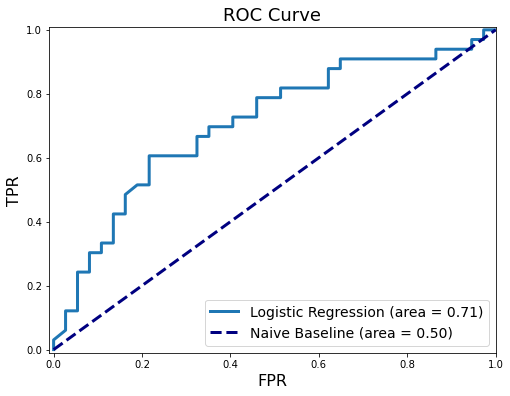

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_train = Team1vsTeam2_train['IsWin']
X_train = Team1vsTeam2_train.drop(['IsWin'], axis=1)
X_test = Team1vsTeam2_test.drop(['IsWin'], axis=1)

fpr, tpr, _ = roc_curve(y_test, y_prob_removedHighVIFVariable)
roc_auc = auc(fpr, tpr) #area under curve

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

---
p-value (Significance of variable)

In [13]:
# CFPM: Average combined kills per minute (teamkills + opponent kills)
# EGR: Early-Game rating
# MLR: Mid/Late rating
# FB: First Blood rate -- for players/championspercent of games earning a First Bloodparticipation (kill or assist)
# FT: First Tower rate
# HLD: Rift Herald rate
# DRG: Dragon control rate: percent of all Dragonskilled that were taken by the team, reflectingonly elemental drakes if ELD% is present
# BN: Baron control rate
# LNE: Lane control
logreg_removedHighpvalueVariable = smf.logit(formula = 'IsWin ~ WR + KD + GPR + GSPD + F3T + FD + ELD + JNG + WPM + CWPM',
                   data = Team1vsTeam2_train).fit()

print(logreg_removedHighpvalueVariable.summary())

Optimization terminated successfully.
         Current function value: 0.602708
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  IsWin   No. Observations:                  276
Model:                          Logit   Df Residuals:                      265
Method:                           MLE   Df Model:                           10
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.1284
Time:                        18:54:53   Log-Likelihood:                -166.35
converged:                       True   LL-Null:                       -190.84
Covariance Type:            nonrobust   LLR p-value:                 4.083e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0895      0.133      0.671      0.502      -0.172       0.351
WR             9.5652      3.

In [14]:
y_prob_removedHighpvalueVariable = logreg_removedHighpvalueVariable.predict(Team1vsTeam2_test)
y_pred_removedHighpvalueVariable = pd.Series([1 if x > 0.5 else 0 for x in y_prob_removedHighpvalueVariable], index=y_prob_removedHighpvalueVariable.index)

cm_removedHighpvalueVariable = confusion_matrix(y_test, y_pred_removedHighpvalueVariable)

# Accuracy, TPR, FPR
Acc_logit_removedHighpvalueVariable = (cm_removedHighpvalueVariable.ravel()[0]+cm_removedHighpvalueVariable.ravel()[3])/sum(cm_removedHighpvalueVariable.ravel())  # T/total = (TP+TN)/total
TPR_logit_removedHighpvalueVariable = (cm_removedHighpvalueVariable.ravel()[3])/(cm_removedHighpvalueVariable.ravel()[2] + cm_removedHighpvalueVariable.ravel()[3])  # TP/TP + FN
FPR_logit_removedHighpvalueVariable = (cm_removedHighpvalueVariable.ravel()[1])/(cm_removedHighpvalueVariable.ravel()[0] + cm_removedHighpvalueVariable.ravel()[1])  # FP/TN + FP
print('The test Accuracy after removing high p-value variables:', Acc_logit_removedHighpvalueVariable, 'TPR: ', TPR_logit_removedHighpvalueVariable, 'FPR: ', FPR_logit_removedHighpvalueVariable)

The test Accuracy after removing high p-value variables: 0.6571428571428571 TPR:  0.7575757575757576 FPR:  0.43243243243243246


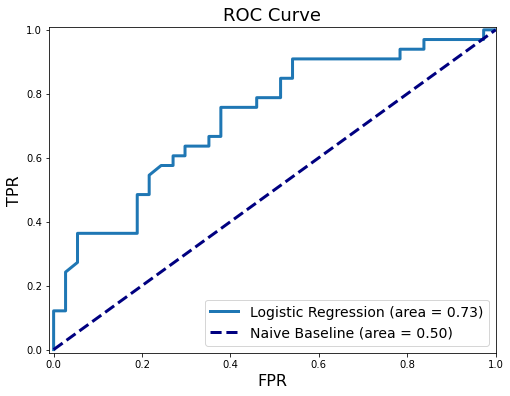

In [15]:
fpr, tpr, _ = roc_curve(y_test, y_prob_removedHighpvalueVariable)
roc_auc = auc(fpr, tpr) #area under curve

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

---
#### K fold Validation

In [16]:
# evaluate a logistic regression model using repeated k-fold cross-validation
# Repeated results may be a better estimate of the true average model performance
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

y = Team1vsTeam2['IsWin']
X = Team1vsTeam2.drop(['IsWin'], axis=1)

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.637 (0.073)


>1 mean=0.6358 se=0.025
>2 mean=0.6402 se=0.017
>3 mean=0.6367 se=0.014
>4 mean=0.6351 se=0.012
>5 mean=0.6337 se=0.011
>6 mean=0.6321 se=0.010
>7 mean=0.6342 se=0.009
>8 mean=0.6334 se=0.008
>9 mean=0.6327 se=0.008
>10 mean=0.6336 se=0.007
>11 mean=0.6338 se=0.007
>12 mean=0.6342 se=0.007
>13 mean=0.6346 se=0.006
>14 mean=0.6349 se=0.006
>15 mean=0.6357 se=0.006


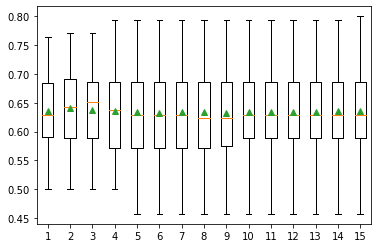

In [17]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# configurations to test
repeats = range(1,16)
results = []
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
    
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

The orange line indicates the median of the distribution and the green triangle indicates the arithmetic mean. If these symbols (values) agree, it indicates that there is a reasonably symmetric distribution and that the mean captures the concentration trend well. With this in mind, 4 repetitions using the chosen test tool and algorithm seems like a good choice, and we have the highest accuracy for logistic regression is 65.7% and we choose the remove insignificant variable model since it has a greater AUC.

---
### Predict the Winner
According to the tournament system, we start with the 8-in-4 prediction, the Top 8 Bo5 (five games to three wins) matches of the 2023 Worlds will be Gen.G vs BLG, NRG vs WBG, the two winners of the four teams will play in the semi-finals, with the winners advancing to the finals; meanwhile, the two winners of JDG vs KT and LNG vs T1 will play in the semi-finals, with the winners advancing to the finals. 

Since the loser of the previous game chooses either the blue or the red side for the next game, and according to the baseline model the blue side has a higher win rate than the red side, we assume that the team that loses in the previous game will choose the blue side in the next game, so we need to consider the case where the teams in the game are on both sides of the table.

In [18]:
year2023StatForWorldsTeam = pd.read_excel(r'year2023StatForWorldsTeam.xlsx') 
year2023StatForWorldsTeam.set_index("team", inplace = True)
year2023StatForWorldsTeam

,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,F3T,HLD,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM
team,,,,,,,,,,,,,,,,,,,
Gen.G,0.726562,1.53,0.75,0.88,0.075,60.8,11.9,0.61,0.66,0.64,0.53,0.44,0.59,0.60,0.64,0.509,0.550,3.13,1.21
T1,0.611511,1.10,0.77,0.79,0.040,59.8,1.4,0.51,0.72,0.71,0.61,0.61,0.58,0.50,0.61,0.504,0.514,3.32,1.40
KT Rolster,0.694215,1.52,0.69,0.61,0.045,57.5,11.9,0.55,0.61,0.64,0.45,0.55,0.60,0.73,0.62,0.506,0.505,3.19,1.37
Dplus KIA,0.606061,1.35,0.67,0.73,0.039,60.5,0.1,0.58,0.53,0.54,0.54,0.62,0.62,0.44,0.57,0.499,0.522,3.40,1.52
JD Gaming,0.777778,1.58,0.86,0.81,0.083,58.5,21.5,0.52,0.55,0.65,0.43,0.50,0.60,0.00,0.64,0.511,0.553,3.31,1.25
Bilibili Gaming,0.641379,1.21,0.91,0.85,0.053,58.7,6.9,0.57,0.52,0.76,0.48,0.59,0.56,0.00,0.59,0.502,0.531,3.32,1.32
LNG Esports,0.651786,1.39,0.81,0.42,0.045,61.4,-1.4,0.61,0.40,0.60,0.60,0.60,0.54,0.00,0.58,0.504,0.505,3.14,1.34
Weibo Gaming,0.607843,1.18,0.82,0.40,0.044,52.3,-18.9,0.45,0.67,0.67,0.50,0.67,0.51,0.00,0.59,0.506,0.520,3.21,1.39
G2 Esports,0.705263,1.36,1.02,1.00,0.069,60.1,10.5,0.48,0.61,0.57,0.64,0.60,0.59,1.00,0.63,0.500,0.539,3.15,0.95


In [19]:
# GenG in Blue
GenG_vs_BLG = year2023StatForWorldsTeam.loc[["Gen.G"]].sub(year2023StatForWorldsTeam.loc[["Bilibili Gaming"]].squeeze())
# BlG in Blue
BLG_vs_GenG = year2023StatForWorldsTeam.loc[["Bilibili Gaming"]].sub(year2023StatForWorldsTeam.loc[["Gen.G"]].squeeze())

# Predict the Winning Rate
GenG_WR = logreg_removedHighpvalueVariable.predict(GenG_vs_BLG)
BLG_WR = logreg_removedHighpvalueVariable.predict(BLG_vs_GenG)
print('The Winning Rate for Gen.G in the blue side is ', GenG_WR, '; the Winning Rate for BLG in the blue side is ', BLG_WR)

The Winning Rate for Gen.G in the blue side is  team
Gen.G    0.779484
dtype: float64 ; the Winning Rate for BLG in the blue side is  team
Bilibili Gaming    0.252827
dtype: float64


In [20]:
# NRG in Blue
NRG_vs_WBG = year2023StatForWorldsTeam.loc[["NRG"]].sub(year2023StatForWorldsTeam.loc[["Weibo Gaming"]].squeeze())
# Weibo Gaming in Blue
WBG_vs_NRG = year2023StatForWorldsTeam.loc[["Weibo Gaming"]].sub(year2023StatForWorldsTeam.loc[["NRG"]].squeeze())

# Predict the Winning Rate
NRG_WR = logreg_removedHighpvalueVariable.predict(NRG_vs_WBG)
WBG_WR = logreg_removedHighpvalueVariable.predict(WBG_vs_NRG)
print('The Winning Rate for NRG in the blue side is ', NRG_WR, '; the Winning Rate for WBG in the blue side is ', WBG_WR)

The Winning Rate for NRG in the blue side is  team
NRG    0.697694
dtype: float64 ; the Winning Rate for WBG in the blue side is  team
Weibo Gaming    0.341354
dtype: float64


In [21]:
# JDG in Blue
JDG_vs_KT = year2023StatForWorldsTeam.loc[["JD Gaming"]].sub(year2023StatForWorldsTeam.loc[["KT Rolster"]].squeeze())
# KT in Blue
KT_vs_JDG = year2023StatForWorldsTeam.loc[["KT Rolster"]].sub(year2023StatForWorldsTeam.loc[["JD Gaming"]].squeeze())

# Predict the Winning Rate
JDG_WR = logreg_removedHighpvalueVariable.predict(JDG_vs_KT)
KT_WR = logreg_removedHighpvalueVariable.predict(KT_vs_JDG)
print('The Winning Rate for JDG in the blue side is ', JDG_WR, '; the Winning Rate for KT in the blue side is ', KT_WR)

The Winning Rate for JDG in the blue side is  team
JD Gaming    0.523949
dtype: float64 ; the Winning Rate for KT in the blue side is  team
KT Rolster    0.520789
dtype: float64


In [22]:
# LNG in Blue
LNG_vs_T1 = year2023StatForWorldsTeam.loc[["LNG Esports"]].sub(year2023StatForWorldsTeam.loc[["T1"]].squeeze())
# T1 in Blue
T1_vs_LNG = year2023StatForWorldsTeam.loc[["T1"]].sub(year2023StatForWorldsTeam.loc[["LNG Esports"]].squeeze())

# Predict the Winning Rate
LNG_WR = logreg_removedHighpvalueVariable.predict(LNG_vs_T1)
T1_WR = logreg_removedHighpvalueVariable.predict(T1_vs_LNG)
print('The Winning Rate for LNG in the blue side is ', LNG_WR, '; the Winning Rate for T1 in the blue side is ', T1_WR)

The Winning Rate for LNG in the blue side is  team
LNG Esports    0.207125
dtype: float64 ; the Winning Rate for T1 in the blue side is  team
T1    0.820747
dtype: float64


#### Semifinals

In [23]:
# GenG in Blue
GenG_vs_NRG = year2023StatForWorldsTeam.loc[["Gen.G"]].sub(year2023StatForWorldsTeam.loc[["NRG"]].squeeze())
# NRG in Blue
NRG_vs_GenG = year2023StatForWorldsTeam.loc[["NRG"]].sub(year2023StatForWorldsTeam.loc[["Gen.G"]].squeeze())

# Predict the Winning Rate
GenG_WR_semi = logreg_removedHighpvalueVariable.predict(GenG_vs_NRG)
NRG_WR_semi = logreg_removedHighpvalueVariable.predict(NRG_vs_GenG)
print('The Winning Rate for Gen.G in the blue side is ', GenG_WR_semi, '; the Winning Rate for NRG in the blue side is ', NRG_WR_semi)

The Winning Rate for Gen.G in the blue side is  team
Gen.G    0.813667
dtype: float64 ; the Winning Rate for NRG in the blue side is  team
NRG    0.215017
dtype: float64


In [24]:
# JDG in Blue
JDG_vs_T1 = year2023StatForWorldsTeam.loc[["JD Gaming"]].sub(year2023StatForWorldsTeam.loc[["T1"]].squeeze())
# T1 in Blue
T1_vs_JDG = year2023StatForWorldsTeam.loc[["T1"]].sub(year2023StatForWorldsTeam.loc[["JD Gaming"]].squeeze())

# Predict the Winning Rate
JDG_WR_semi = logreg_removedHighpvalueVariable.predict(JDG_vs_T1)
T1_WR_semi = logreg_removedHighpvalueVariable.predict(T1_vs_JDG)
print('The Winning Rate for JDG in the blue side is ', JDG_WR_semi, '; the Winning Rate for T1 in the blue side is ', T1_WR_semi)

The Winning Rate for JDG in the blue side is  team
JD Gaming    0.529698
dtype: float64 ; the Winning Rate for T1 in the blue side is  team
T1    0.51503
dtype: float64


#### Final

In [25]:
# GenG in Blue
GenG_vs_JDG = year2023StatForWorldsTeam.loc[["Gen.G"]].sub(year2023StatForWorldsTeam.loc[["JD Gaming"]].squeeze())
# JDG in Blue
JDG_vs_GenG = year2023StatForWorldsTeam.loc[["JD Gaming"]].sub(year2023StatForWorldsTeam.loc[["Gen.G"]].squeeze())

# Predict the Winning Rate
GenG_WR_final = logreg_removedHighpvalueVariable.predict(GenG_vs_JDG)
JDG_WR_final = logreg_removedHighpvalueVariable.predict(JDG_vs_GenG)
print('The Winning Rate for Gen.G in the blue side is ', GenG_WR_final, '; the Winning Rate for JDG in the blue side is ', JDG_WR_final)

The Winning Rate for Gen.G in the blue side is  team
Gen.G    0.646788
dtype: float64 ; the Winning Rate for JDG in the blue side is  team
JD Gaming    0.39511
dtype: float64


By the Prediction of using Logistic Regression, The winner is Gen.G